In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LSTM
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional     
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout

In [2]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

In [3]:
df = pd.read_csv('../input/water-potability/water_potability.csv')
df.shape

(3276, 10)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.fillna(df.mean(), inplace=True)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
from collections import Counter
from imblearn.over_sampling import SMOTE
X = df.drop(["Potability"], axis=1)
y = df["Potability"]
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape

(3196, 9, 1)

In [11]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape

(800, 9, 1)

In [12]:
model = Sequential()
model.add(Conv1D(128, 3, padding="same",input_shape =(9,1), activation='relu'))
model.add(MaxPool1D(pool_size=(2)))  
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, padding="same",input_shape =(9,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=(2)))  
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv1D(64, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(2)))  
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=64))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=100,
                    callbacks=[early],
                    validation_split=0.2,
                    verbose=1
                   )

2022-11-02 15:34:54.185057: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 15:34:54.186048: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 15:34:54.662894: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 15:34:54.664416: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 15:34:54.665642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/200


2022-11-02 15:35:04.186110: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


26/26 [==============================] - 16s 22ms/step - loss: 0.7555 - accuracy: 0.5207 - val_loss: 0.6882 - val_accuracy: 0.5813
Epoch 2/200
26/26 [==============================] - 0s 6ms/step - loss: 0.6908 - accuracy: 0.5383 - val_loss: 0.6881 - val_accuracy: 0.5688
Epoch 3/200
26/26 [==============================] - 0s 6ms/step - loss: 0.6806 - accuracy: 0.5579 - val_loss: 0.6868 - val_accuracy: 0.5797
Epoch 4/200
26/26 [==============================] - 0s 6ms/step - loss: 0.6652 - accuracy: 0.5884 - val_loss: 0.6847 - val_accuracy: 0.5734
Epoch 5/200
26/26 [==============================] - 0s 6ms/step - loss: 0.6626 - accuracy: 0.5865 - val_loss: 0.6814 - val_accuracy: 0.5813
Epoch 6/200
26/26 [==============================] - 0s 6ms/step - loss: 0.6577 - accuracy: 0.6025 - val_loss: 0.6794 - val_accuracy: 0.6078
Epoch 7/200
26/26 [==============================] - 0s 6ms/step - loss: 0.6490 - accuracy: 0.6209 - val_loss: 0.6768 - val_accuracy: 0.5703
Epoch 8/200
26/26 [====

In [13]:
model_loss = pd.DataFrame(model.history.history)

Text(0, 0.5, 'accuracy')

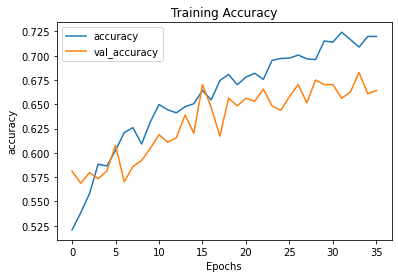

In [14]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

In [15]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       397
           1       0.65      0.66      0.65       403

    accuracy                           0.65       800
   macro avg       0.65      0.65      0.65       800
weighted avg       0.65      0.65      0.65       800



In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[253 144]
 [139 264]]
Accuracy: 64.625%
